# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:

X_train = pd.read_csv('/content/drive/MyDrive/X_train_comp.csv')
y_train = pd.read_csv('/content/drive/MyDrive/y_train.txt', sep=' ', header=None)
X_test = pd.read_csv('/content/drive/MyDrive/X_test_comp.csv')
y_test = pd.read_csv('/content/drive/MyDrive/y_test.txt', sep=' ', header=None)

In [108]:
y_train.columns = ['status']
y_test.columns = ['status']

In [109]:
X_train.drop(labels='Unnamed: 0', axis=1, inplace=True)
X_test.drop(labels='Unnamed: 0', axis=1, inplace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [110]:

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=1729)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [111]:
# Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis

clf = DecisionTreeClassifier(random_state=2360873, max_depth=4).fit(X_train, y_train)

In [112]:
# considere as 3 variáveis com maior importância para os próximos passos

indice_importancia = []

lista_importancia = clf.feature_importances_

while len(indice_importancia) < 3:

  indice_importancia.append(np.argmax(lista_importancia))

  lista_importancia[np.argmax(lista_importancia)] = 0

X_train.columns[indice_importancia] # As 3 variáveis com maior importância


Index(['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)'], dtype='object')

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [113]:

caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [114]:

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train)
    clfs.append(clf)

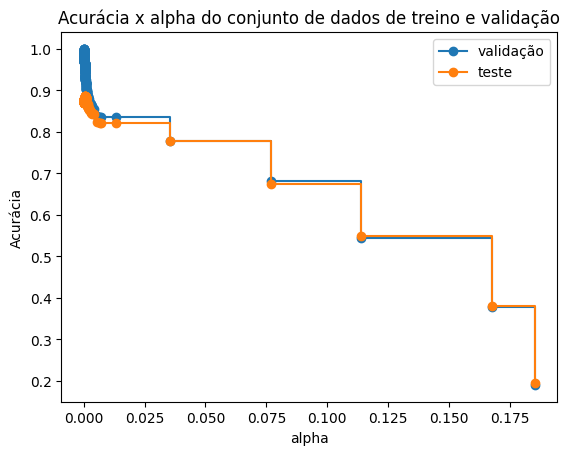

In [115]:

# Encontre o melhor ccp_alpha utilizando a base de validação

train_scores = [clf.score(X_train[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_train) for clf in clfs]
valid_scores = [clf.score(X_valid[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [116]:


ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 88.63


DecisionTreeClassifier(ccp_alpha=0.00047359892972861743, random_state=2360873)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [117]:

acuracia_teste = melhor_arvore.score(X_test[['tGravityAcc-energy()-X', 'fBodyAcc-mad()-X', 'angle(Y,gravityMean)']], y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')



Acurácia: 72.28
